# Ejercicio 24
Para el siguiente proceso, utilizando vapor de agua. Determinar:

1. Estado de vapor en 3
2. Calor recibido
3. Potencia entregada por la turbina

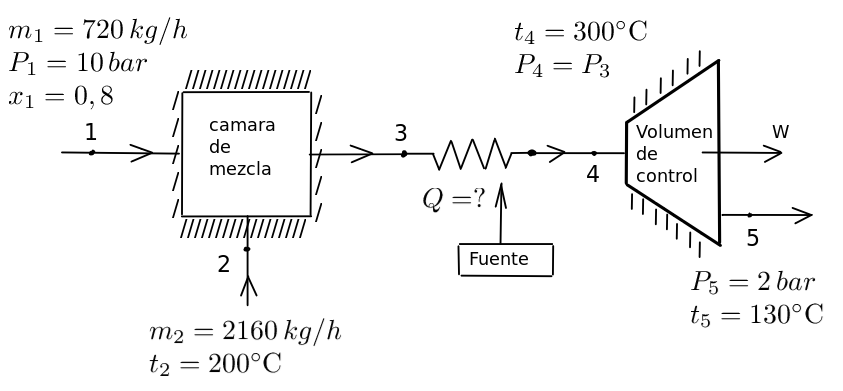

## Solución

In [ ]:
# Datos:
m_1 = 720*(1/3600) # [kg/s]
P_1 = 10e5 # [Pa]
x_1 = 0.8
m_2 = 2160*(1/3600) # [kg/s]
T_2 = 200 + 273.15 # [K]
T_4 = 300 + 273.15 # [K]
P_2 = P_1
P_3 = P_1
P_4 = P_3
P_5 = 2e5 # [Pa]
T_5 = 130 + 273.15 # [K]

In [ ]:
!pip install CoolProp
import CoolProp.CoolProp as cp

     |████████████████████████████████| 4.2 MB 4.2 MB/s 


### 1) Estado de vapor en 3

__Cámara de mezcla:__

$$ Q - W = \Delta H \tag{1} $$

$$ Q = 0 \quad \rightarrow \quad h_e = h_s \tag{2} $$

$$ \dot{m}_1 + \dot{m}_2 = \dot{m}_3 \tag{3} $$

$$ \dot{m}_1 h_1 + \dot{m}_2 h_2 = \dot{m}_3 h_3 \tag{4} $$

$$ P = \mbox{cte.} \tag{5} $$

$$ h_1 = x_1 \, (h'' - h') + h' \tag{6} $$

In [ ]:
# Entalpía en 1
hp1 = cp.PropsSI('H','P',P_1,'Q',0,'Water')  # h'
hp2 = cp.PropsSI('H','P',P_1,'Q',1,'Water')  # h''

h_1 = x_1*(hp2 - hp1) + hp1

In [ ]:
#@title
print('h_1 = %.2f (kJ/kg)'%(h_1/1000))

h_1 = 2374.19 (kJ/kg)


In [ ]:
h_1 = cp.PropsSI('H','P',P_1,'Q',x_1,'Water') # Entalpía en 1
h_2 = cp.PropsSI('H','P',P_2,'T',T_2,'Water') # Entalpía en 2

In [ ]:
#@title 
print('h_1 = %.2f (kJ/kg)'%(h_1/1000))
print('h_2 = %.2f (kJ/kg)'%(h_2/1000))

h_1 = 2374.19 (kJ/kg)
h_2 = 2828.26 (kJ/kg)


Despejamos $h_3$ de $(4)$
$$ h_3 = \frac{\dot{m}_1 h_1 + \dot{m}_2 h_2}{\dot{m}_3} $$

In [ ]:
m_3 = m_1 + m_2

h_3 = (m_1*h_1 + m_2*h_2)/m_3

In [ ]:
#@title
print('m_3 = %.2f (kg)'%m_3)
print('h_3 = %.2f (kJ/kg)'%(h_3/1000))

m_3 = 0.80 (kg)
h_3 = 2714.75 (kJ/kg)


In [ ]:
hp1 = cp.PropsSI('H','P',P_3,'Q',0,'Water')  # h'
hp2 = cp.PropsSI('H','P',P_3,'Q',1,'Water')  # h''

$$ h_3 = x_3 \, (h'' - h') + h' \tag{7} $$

Despejamos $x_3$ de $(7)$
$$ x_3 = \frac{ h_3 - h' }{ h'' - h' } $$

In [ ]:
x_3 = (h_3 - hp1)/(hp2 - hp1)

In [ ]:
#@title 
print('x_3 = %.4f'%x_3)
print('-> %.2f%% (vapor)'%(x_3*100))
print('->  %.2f%% (líquido)'%((1 - x_3)*100) )

x_3 = 0.9690
-> 96.90% (vapor)
->  3.10% (líquido)


### 2) Calor recibido

$$ Q = m_3 \, (h_4 - h_3) \tag{8} $$

In [ ]:
h_4 = cp.PropsSI('H','P',P_4,'T',T_4,'Water')  # Entalpia en 4

In [ ]:
# Calor recibido
Q = m_3*(h_4 - h_3)

In [ ]:
#@title
print('Q = %.2f (kJ/kg)'%(Q/1000))

Q = 269.51 (kJ/kg)


### 3) Potencia entregada por la turbina

__Turbina:__
$$ Q - W = \Delta H \tag{9} $$

$$ Q = 0 \tag{10} $$

Entonces obtenemos:
$$ -W = m \, (h_s - h_e) $$

$$ W = m (h_e - h_s) \tag{11} $$

In [ ]:
h_5 = cp.PropsSI('H','P',P_5,'T',T_5,'Water')

In [ ]:
#@title 
print('h_5 = %.2f (kJ/kg)'%(h_5/1000))

h_5 = 2727.27 (kJ/kg)


In [ ]:
m_4 = m_3
m_5 = m_4

In [ ]:
W = m_4*(h_4 - h_5)

In [ ]:
#@title
print('Potencia entregada')
print('W = %.2f (kJ/kg)'%(W/1000))

Potencia entregada
W = 259.49 (kJ/kg)
